# Human Emotions Predictive Model

In [241]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
e = pd.read_csv(r'C:\Users\admin\Music\imarticus python\emotion_nlp.csv')

In [243]:
e.head()

,Text,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [244]:
e.Emotions.value_counts()

Emotions
joy         6056
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: count, dtype: int64

In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
le = LabelEncoder()

In [247]:
e.Emotions = le.fit_transform(e.Emotions)

In [248]:
e.head()

,Text,Emotions
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


In [249]:
e.rename(columns = {'Emotions':'Y','Text':'X'},inplace = True)

In [250]:
e.Y.value_counts()

Y
2    6056
4    5247
0    2434
1    2161
3    1463
5     638
Name: count, dtype: int64

In [251]:
e['Y'] = e['Y'].replace(4, 1)
e['Y'] = e['Y'].replace(0, 1)
e['Y'] = e['Y'].replace(1, 1)
e['Y'] = e['Y'].replace(2, 2)
e['Y'] = e['Y'].replace(3, 2)
e['Y'] = e['Y'].replace(5, 2)

# creating two groups :
#     Group 1 :  Negative emotions like sadness, anger, and fear where 4,0,1 are assign as negative emotions.
#     Group 2 :  Positive emotions like joy, love, and surprise where 2,3,4 are assign as Positive emotions.    

In [252]:
e.head()

,X,Y
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [253]:
e['X'] = e['X'].str.lower()

In [254]:
e.head()

,X,Y
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [255]:
import nltk
from nltk.corpus import stopwords

In [256]:
l1 = list(stopwords.words('english'))

In [257]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [258]:
def text_process(mess):            ### creating a function

    """                                                        ## a docstring

    1. remove the punctuation

    2. remove the stopwords

    3. return the list of clean textwords

    

    """

    nopunc = [char for char in mess if char not in string.punctuation]  #list comprehension

    nopunc = "".join(nopunc)

    

    return [ word for word in nopunc.split() if word not in l1]

In [259]:
from sklearn.feature_extraction.text import CountVectorizer

In [260]:
bow_transformer   = CountVectorizer(analyzer = text_process).fit(e['X'])

In [261]:
bow_transformer.vocabulary_  #counting the words multiple times

{'didnt': 3834,
 'feel': 5205,
 'humiliated': 6786,
 'go': 5997,
 'feeling': 5209,
 'hopeless': 6687,
 'damned': 3392,
 'hopeful': 6685,
 'around': 726,
 'someone': 13096,
 'cares': 2062,
 'awake': 974,
 'im': 6920,
 'grabbing': 6058,
 'minute': 8934,
 'post': 10731,
 'greedy': 6120,
 'wrong': 15877,
 'ever': 4830,
 'nostalgic': 9576,
 'fireplace': 5342,
 'know': 7832,
 'still': 13463,
 'property': 11032,
 'grouchy': 6160,
 'ive': 7442,
 'little': 8241,
 'burdened': 1870,
 'lately': 7950,
 'wasnt': 15482,
 'sure': 13811,
 'taking': 13975,
 'milligrams': 8890,
 'times': 14361,
 'recommended': 11455,
 'amount': 484,
 'fallen': 5093,
 'asleep': 798,
 'lot': 8351,
 'faster': 5140,
 'also': 429,
 'like': 8164,
 'funny': 5747,
 'confused': 2837,
 'life': 8137,
 'teenager': 14091,
 'jaded': 7458,
 'year': 15934,
 'old': 9767,
 'man': 8527,
 'petronas': 10378,
 'years': 15942,
 'performed': 10304,
 'well': 15573,
 'made': 8463,
 'huge': 6763,
 'profit': 10985,
 'romantic': 11990,
 'make': 8501

In [262]:
e_bow = bow_transformer.transform(e.X)

In [263]:
e_bow.shape

(17999, 16035)

In [264]:
from sklearn.metrics import *

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
train_x,test_x , train_y,test_y = train_test_split(e_bow,e.Y)

# Logistic Regression Model

In [267]:
from sklearn.linear_model import LogisticRegression

In [268]:
lr_e = LogisticRegression(class_weight='balanced')
lr_e.fit(train_x,train_y)

LogisticRegression(class_weight='balanced')

In [269]:
pred_e = lr_e.predict(test_x)
pred_e

array([1, 2, 2, ..., 1, 1, 2])

In [270]:
tab_l_e = confusion_matrix(test_y,pred_e)

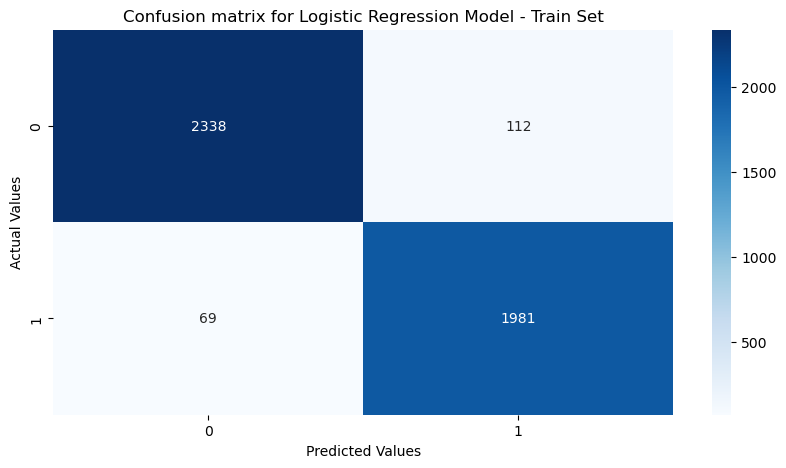

In [271]:
# Plotting the confusion matrix
plt.figure(figsize=(10,5))
p = sns.heatmap(tab_l_e, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Logistic Regression Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [272]:
print(tab_l_e)
print('accuracy is' , tab_l_e.diagonal().sum()* 100 / tab_l_e.sum())

[[2338  112]
 [  69 1981]]
accuracy is 95.97777777777777


In [273]:
print(classification_report(test_y,pred_e))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      2450
           2       0.95      0.97      0.96      2050

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



In [274]:
# The accuracy has improved to 96%, meaning the model is highly reliable at distinguishing between positive 
# and negative emotions.
# Both groups (positive and negative emotions) are predicted with similar effectiveness, as seen in the balanced precision,
# recall, and F1-scores.
# The use of class_weight='balanced' likely helped improve performance by compensating for any imbalance between
# the number of samples in the two groups

# Decision Tree Model

In [275]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
dt_e = DecisionTreeClassifier(class_weight='balanced')
dt_e.fit(train_x,train_y)

DecisionTreeClassifier(class_weight='balanced')

In [277]:
pred_e = dt_e.predict(test_x)
pred_e

array([2, 2, 2, ..., 1, 1, 2])

In [278]:
tab_e = confusion_matrix(test_y,pred_e)

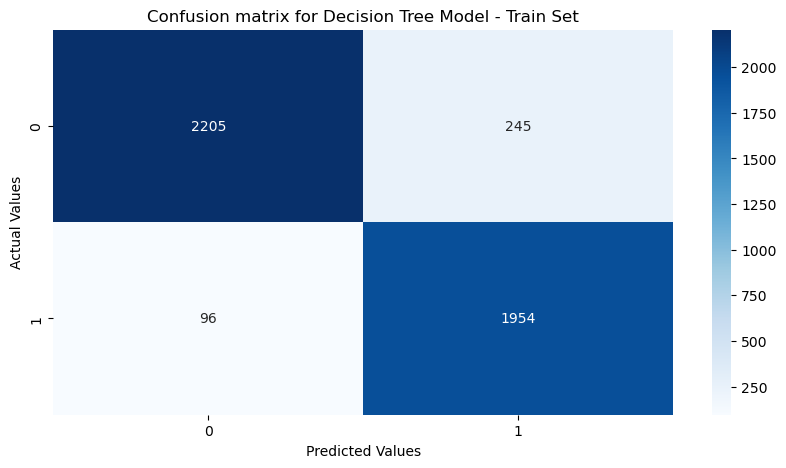

In [279]:
# Plotting the confusion matrix
plt.figure(figsize=(10,5))
p = sns.heatmap(tab_e, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [280]:
print(tab_e)
print('accuracy is' , tab_e.diagonal().sum()* 100 / tab_e.sum())

[[2205  245]
 [  96 1954]]
accuracy is 92.42222222222222


In [281]:
print(classification_report(test_y,pred_e))

              precision    recall  f1-score   support

           1       0.96      0.90      0.93      2450
           2       0.89      0.95      0.92      2050

    accuracy                           0.92      4500
   macro avg       0.92      0.93      0.92      4500
weighted avg       0.93      0.92      0.92      4500



In [282]:
# The decision tree model achieves 92% accuracy, which is good for a simpler model like a decision tree.
# It performs slightly better at identifying negative emotions (Group 1) (higher precision),
# while it is slightly better at capturing positive emotions (Group 2) (higher recall).
# While not as accurate as the logistic regression model (96%), this decision tree provides reasonable results 
# and may be simpler to interpret for understanding decision-making processes.

# Random Forest Model

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
rfc_e = RandomForestClassifier(class_weight='balanced')
rfc_e.fit(train_x,train_y)

RandomForestClassifier(class_weight='balanced')

In [285]:
pred_e = rfc_e.predict(test_x)
pred_e

array([1, 2, 2, ..., 1, 1, 2])

In [286]:
tab_e = confusion_matrix(test_y,pred_e)

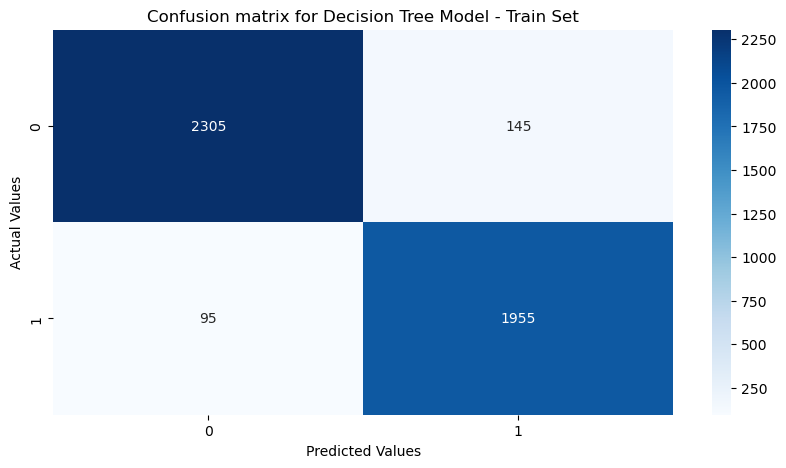

In [287]:
# Plotting the confusion matrix
plt.figure(figsize=(10,5))
p = sns.heatmap(tab_e, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [288]:
print(tab_e)
print('accuracy is' , tab_e.diagonal().sum()* 100 / tab_e.sum())

[[2305  145]
 [  95 1955]]
accuracy is 94.66666666666667


In [289]:
print(classification_report(test_y,pred_e))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95      2450
           2       0.93      0.95      0.94      2050

    accuracy                           0.95      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.95      0.95      0.95      4500



In [290]:
# The random forest model achieves a high accuracy of 95%, making it a strong performer.
# It performs slightly better for negative emotions (Group 1), as seen in the higher precision for this class.
# Both groups (positive and negative emotions) are well-classified,
# as indicated by balanced F1-scores (0.95 for Group 1 and 0.94 for Group 2).
# The random forest model demonstrates strong overall performance, balancing precision, recall, and F1-score,
# making it suitable for applications requiring reliable emotion classification.